In [7]:
from explore import *
from predict import *
import tensorflow as tf
import numpy as np
import pandas as pd

In [8]:
conn, engine = init_db()
dfs = explore(conn, engine)
dfs = analise_especifica(dfs)

{'DailySales': None, 'OneK': None, 'Retailers': None, 'Products': None, 'Methods': None}
DailySales: 8756
--------------
retailer_code: INTEGER
Sample: [1209, 1209, 1283]
Average: 1259.6070123343993
--------------
order_method_code: INTEGER
Sample: [1, 1, 1]
Average: 4.333942439470078
--------------
product_number: INTEGER
Sample: [76110, 87110, 124190]
Average: 99370.25239835541
--------------
quantity: INTEGER
Sample: [477, 267, 217]
Average: 208.21984924623115
--------------
date: DATETIME
Sample: [datetime.datetime(2018, 1, 16, 0, 0), datetime.datetime(2018, 5, 17, 0, 0), datetime.datetime(2016, 1, 20, 0, 0)]
Mean: 2016-07-07 03:58:47.638190848
--------------
unit_price: FLOAT
Sample: [40.52, 6.01, 43.85]
Average: 151.47626998629613
--------------
unit_sale_price: FLOAT
Sample: [39.71, 6.01, 43.85]
Average: 145.3455801735972
OneK: 891
--------------
retailer_code: INTEGER
Sample: [1115, 1115, 1115]
Average: 1261.314253647587
--------------
product_number: INTEGER
Sample: [125110, 1

In [9]:
dds: pd.DataFrame = dfs["DailySales"]
dok: pd.DataFrame = dfs["OneK"]
drt: pd.DataFrame = dfs["Retailers"]
dpd: pd.DataFrame = dfs["Products"]
dmt: pd.DataFrame = dfs["Methods"]

l = [dds, dok, drt, dpd, dmt]

In [12]:
dpd

,product_number,product,product_line,product_type,product_brand,product_color,unit_cost,unit_price,quantidade_vendida,lucro_unitario,margem_percentual,custo,lucro_bruto,lucro_liquido
0,1110,TrailChef Water Bag,Camping Equipment,Cooking Gear,TrailChef,Clear,2.77,6.59,14.0,3.82,1.379061,38.78,92.26,53.48
1,2110,TrailChef Canteen,Camping Equipment,Cooking Gear,TrailChef,Brown,6.92,12.92,8.0,6.00,0.867052,55.36,103.36,48.00
2,3110,TrailChef Kitchen Kit,Camping Equipment,Cooking Gear,TrailChef,Unspecified,15.78,23.80,44.0,8.02,0.508238,694.32,1047.20,352.88
3,4110,TrailChef Cup,Camping Equipment,Cooking Gear,TrailChef,Silver,0.85,3.66,22.0,2.81,3.305882,18.70,80.52,61.82
4,5110,TrailChef Cook Set,Camping Equipment,Cooking Gear,TrailChef,Silver,34.41,54.93,27.0,20.52,0.596338,929.07,1483.11,554.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,154110,Kodiak,Personal Accessories,Watches,Trakker,Blue,66.67,120.30,13.0,53.63,0.804410,866.71,1563.90,697.19
270,154120,Kodiak,Personal Accessories,Watches,Trakker,Brown,67.79,122.51,NaN,NaN,NaN,NaN,NaN,NaN
271,154130,Kodiak,Personal Accessories,Watches,Trakker,Green,66.83,120.76,NaN,NaN,NaN,NaN,NaN,NaN
272,154140,Kodiak,Personal Accessories,Watches,Trakker,Silver,74.11,136.20,NaN,NaN,NaN,NaN,NaN,NaN


[120. 118.  87.  82.  70.  68.  66.  66.  62.  61.  61.  61.  61.  61.
  61.  60.  60.  59.  56.  56.  55.  55.  55.  54.  54.  53.  52.  51.
  51.  51.  50.  49.  49.  48.  48.  48.  48.  47.  46.  46.  46.  46.
  45.  45.  44.  44.  44.  44.  44.  43.  43.  43.  43.  41.  41.  40.
  40.  39.  39.  39.  39.  39.  39.  38.  37.  37.  36.  36.  35.  35.
  35.  34.  34.  33.  32.  32.  31.  31.  31.  30.  30.  30.  29.  28.
  28.  28.  27.  27.  27.  27.  26.  26.  25.  25.  25.  23.  23.  23.
  22.  22.  22.  22.  21.  21.  20.  20.  20.  18.  18.  18.  18.  18.
  18.  17.  17.  16.  16.  15.  14.  14.  14.  14.  14.  14.  13.  12.
  12.  12.  11.   9.   8.   8.   7.   6.   6.   5.   4.   3.   1.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

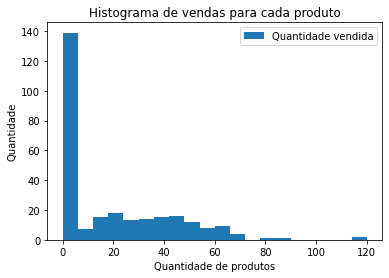

In [34]:
q = dpd["quantidade_vendida"].fillna(0).to_numpy()
q.sort(axis=0, order=None)
q = q[::-1]
print(q)
plt.hist(q, label="Quantidade vendida", bins=20)

# Set plot title and axis labels
plt.title("Histograma de vendas para cada produto")
plt.legend()
plt.xlabel("Quantidade de produtos")
plt.ylabel("Quantidade")

# Display the plot
plt.show()

In [5]:
dds_by_date: pd.DataFrame = dfs["DailySales"].drop_duplicates(subset="date")
dds_by_date = dds_by_date.sort_values(by="date")

In [6]:
ndf = pd.DataFrame()
ndf["date"] = dds_by_date["date"]

for i, col in ndf.iterrows():
    sales_info = dds[dds["date"].eq(col["date"])]
    lucro_brutos = 0
    custos = 0
    liquidos = 0
    for _, sale_info in sales_info.iterrows():
        pid = sale_info["product_number"]
        product_info = dpd[dpd["product_number"].eq(pid)]
        quantity = sale_info["quantity"]
        price = float(product_info["unit_price"].iloc[0])
        custo = float(product_info["unit_cost"].iloc[0])
        gross = price * quantity
        lucro_brutos += gross
        custos += custo * quantity
        liquidos += gross - custo

    ndf.at[i, "lucro_bruto"] = lucro_brutos
    ndf.at[i, "custo"] = custos
    ndf.at[i, "lucro_liquido"] = liquidos

vdf = ndf
vdf['date'] = vdf['date'].astype('int64')
vdf['date'] = vdf['date'].apply(lambda x: x/100000000000)
vdf['date'] = vdf['date'].astype('int32')
vdf["lucro_bruto"] = vdf["lucro_bruto"].astype("int32")
vdf["custo"] = vdf["custo"].astype("int32")
vdf["lucro_liquido"] = vdf["lucro_liquido"].astype("int32")

In [7]:
from src.explore import *
import tensorflow as tf
import random
import numpy as np


def sale_predictor(dfs):
    nn, predictor = create_neural_network([1, 2, 3], [1, 2, 3])


# rede neural generalizada para qualquer X, Y
def create_neural_network(x, y, shape_x, shape_y, test_size=0.2):
    # predict overall daily sales liquid profit for a given date
    # x: past sales data
    # y: liquid profit

    size = shape_x[0]
    size_train = int(size*(1.0-test_size))

    x_train, x_test = x[:size_train], x[size_train:]
    y_train, y_test = y[:size_train], y[size_train:]

    print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)
    print("ok now try make it")

    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=shape_x[1:]),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(y.max()),
        ]
    )

    predictions = model(x_train).numpy()

    tf.nn.softmax(predictions).numpy()

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

    min_iter = 0
    iterc = 0
    min_acc = 0.8
    history = None

    while (
        history is None
        or history.history["accuracy"][-1:][0] < min_acc
        or iterc < min_iter
    ):
        history = model.fit(x_train, y_train, epochs=5)
        print("last acc:", history.history["accuracy"][-1:][0])
        iterc += 1

    model.evaluate(x_test, y_test, verbose=2)

    return model, model.predict

In [8]:
vdf

,date,lucro_bruto,custo,lucro_liquido
228,14210208,8749217,4471905,8702220
596,14211072,2006425,1041182,1997340
553,14211936,106813,54617,104229
104,14212800,94548,54547,92672
618,14213664,160185,99246,158806
...,...,...,...,...
3574,15316992,9174,5497,8455
4097,15317856,64490,38904,63834
3231,15318720,33636,18579,33169
6403,15319584,9289,5122,8907


In [9]:
x = vdf["date"].to_numpy()
y = vdf["lucro_liquido"].to_numpy()
x.shape = (x.shape[0], 1)
y.shape = (y.shape[0], 1)
print(x.shape, y.shape)
print(x[0:10], y[0:10])
nn, predict = create_neural_network(x, y, x.shape, y.shape)


(434, 1) (434, 1)
[[14210208]
 [14211072]
 [14211936]
 [14212800]
 [14213664]
 [14216256]
 [14217120]
 [14217984]
 [14218848]
 [14219712]] [[8702220]
 [1997340]
 [ 104229]
 [  92672]
 [ 158806]
 [ 166822]
 [  22303]
 [ 161187]
 [ 831139]
 [ 332350]]
(347, 1) (347, 1) (87, 1) (87, 1)
ok now try make it


2023-06-26 14:17:04.761854: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4455536640 exceeds 10% of free system memory.
2023-06-26 14:17:09.206716: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4455536640 exceeds 10% of free system memory.
2023-06-26 14:17:11.171043: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4455536640 exceeds 10% of free system memory.


: 

: 

In [ ]:
import matplotlib.pyplot as plt

df = ndf[ndf["date"] > ndf["date"].min() + pd.Timedelta(days=365)]

# Create a line plot from the DataFrame
# plt.plot(df['date'].to_numpy(), df['lucro_bruto'].to_numpy(), label="lucro bruto")
# plt.plot(df['date'].to_numpy(), df['custo'].to_numpy(), label="gastos")
plt.plot(df['date'].to_numpy(), df['lucro_liquido'].to_numpy(), label="lucro liquido")

# Set plot title and axis labels
plt.title('Sales Over Years')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales')

# Display the plot
plt.show()

In [4]:
import numpy as np
from sklearn.cluster import KMeans

# Generate some sample data
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print the cluster labels and centroids
print("Cluster Labels:")
print(labels)
print("Centroids:")
print(centroids)

# Get the cluster labels
labels = kmeans.labels_

# Print the items with their respective groups
for i, point in enumerate(X):
    group = labels[i]
    print(f"Point {point} belongs to Group {group}")


Cluster Labels:
[0 0 1 1 0 2]
Centroids:
[[ 1.16666667  1.46666667]
 [ 6.5         8.        ]
 [ 9.         11.        ]]
Point [1. 2.] belongs to Group 0
Point [1.5 1.8] belongs to Group 0
Point [5. 8.] belongs to Group 1
Point [8. 8.] belongs to Group 1
Point [1.  0.6] belongs to Group 0
Point [ 9. 11.] belongs to Group 2


/home/renato/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
